In [82]:
import numpy as np
import matplotlib.pyplot as plt
import gzip
import pyvista as pv
import scipy as sc
import math
%matplotlib qt

In [83]:
class quadrupole:
    def __init__(self, data):
        self.data = data
        self.src = pv.PolyData(self.data.T[:3].T)
        self.src['Bx'] = self.data.T[3].T
        self.src['By'] = self.data.T[4].T
        self.src['Bz'] = self.data.T[5].T

    def plot(self):
        self.src.plot(scalars="By")
        
    def plot_plane(self, xmin, xmax, nx, ymin, ymax, ny, zmin, zmax, nz, field, radius=0.01):
        x = np.linspace(xmin, xmax, nx)
        y = np.linspace(ymin, ymax, ny)
        z = np.linspace(zmin, zmax, nz)
        
        X, Y, Z = np.meshgrid(x, y, z)
        XYZ = np.array([X.flatten(), Y.flatten(), Z.flatten()]).T
        dst = pv.PolyData(XYZ).interpolate(self.src, radius=radius)
        
        dst.plot(scalars=field)
        
    def fit_xprofile(self, xmin, xmax, nx, ypos, zpos, field, radius=0.01, ax=None, color=None):
        x = np.linspace(xmin, xmax, nx)
        y = [ypos]
        z = [zpos]
        X, Y, Z = np.meshgrid(x, y, z)
        XYZ = np.array([X.flatten(), Y.flatten(), Z.flatten()]).T
        dst = pv.PolyData(XYZ).interpolate(self.src, radius=radius)
        
        dst['x'] = X.flatten()
        dst['y'] = Y.flatten()
        dst['z'] = Z.flatten()
        
        if ax is None:
            fig, ax = plt.subplots()
        ax.plot(dst['x'], dst[field], label=f"y={ypos}, z={zpos}", color=color)
        ax.set_xlabel('x')
        ax.set_ylabel(field)
        ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
        
    def fit_zprofile(self, zmin, zmax, nz, xpos, ypos, field, radius=0.01, ax=None, color=None):
        x = [xpos]
        y = [ypos]
        z = np.linspace(zmin, zmax, nz)
        X, Y, Z = np.meshgrid(x, y, z)
        XYZ = np.array([X.flatten(), Y.flatten(), Z.flatten()]).T
        dst = pv.PolyData(XYZ).interpolate(self.src, radius=radius)
        dst['x'] = X.flatten()
        dst['y'] = Y.flatten()
        dst['z'] = Z.flatten()

        if ax is None:
            fig, ax = plt.subplots()
        ax.plot(dst['z'], dst[field], label=f"x={xpos}, y={ypos}", color=color)
        ax.set_xlabel('z')
        ax.set_ylabel(field)
        ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
        

/home/silke/miniforge3/envs/xsuite/lib/python3.13/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


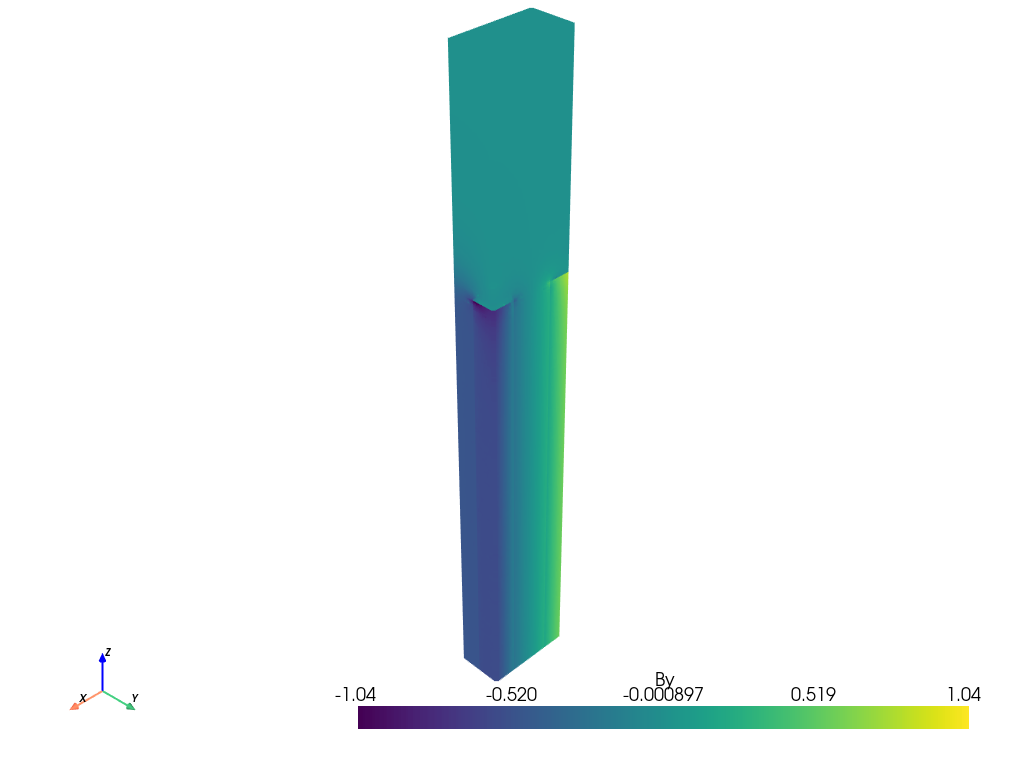

In [84]:
data_quad=np.loadtxt("field_map_straight_quad_resol_2mm.txt",skiprows=9)
quad = quadrupole(data)
quad.plot()

/home/silke/miniforge3/envs/xsuite/lib/python3.13/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


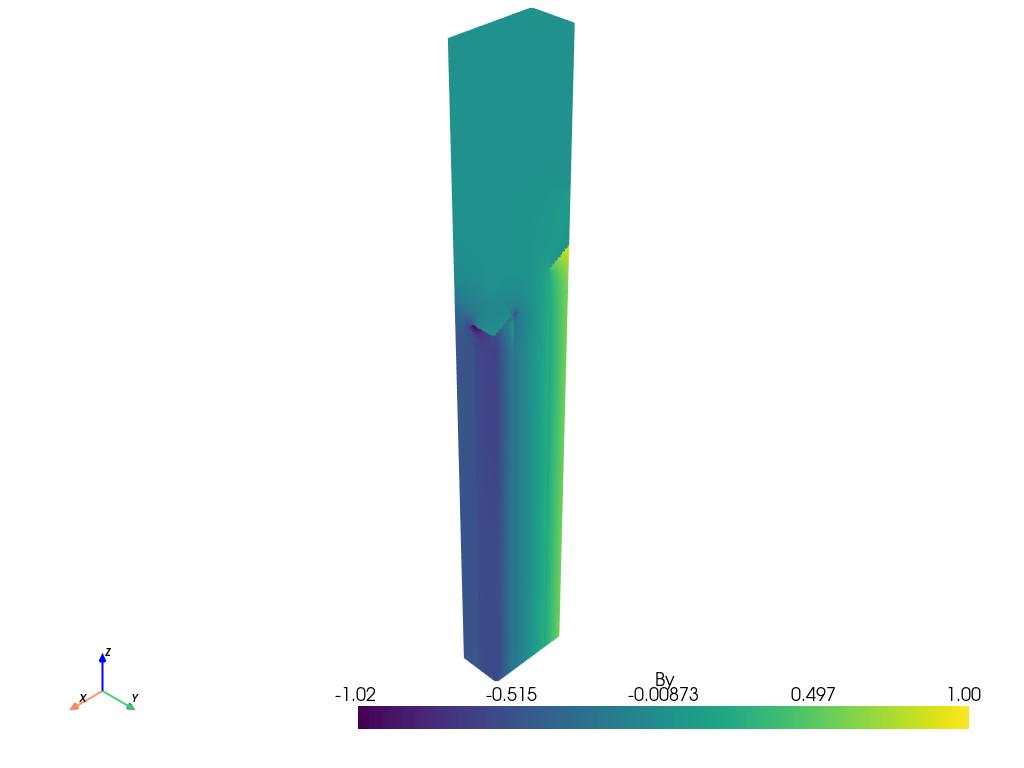

In [85]:
data_cutquad=np.loadtxt("field_map_quad_edge_30deg_resol_2mm.txt",skiprows=9)
cutquad = quadrupole(data_cutquad)
cutquad.plot()

/home/silke/miniforge3/envs/xsuite/lib/python3.13/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


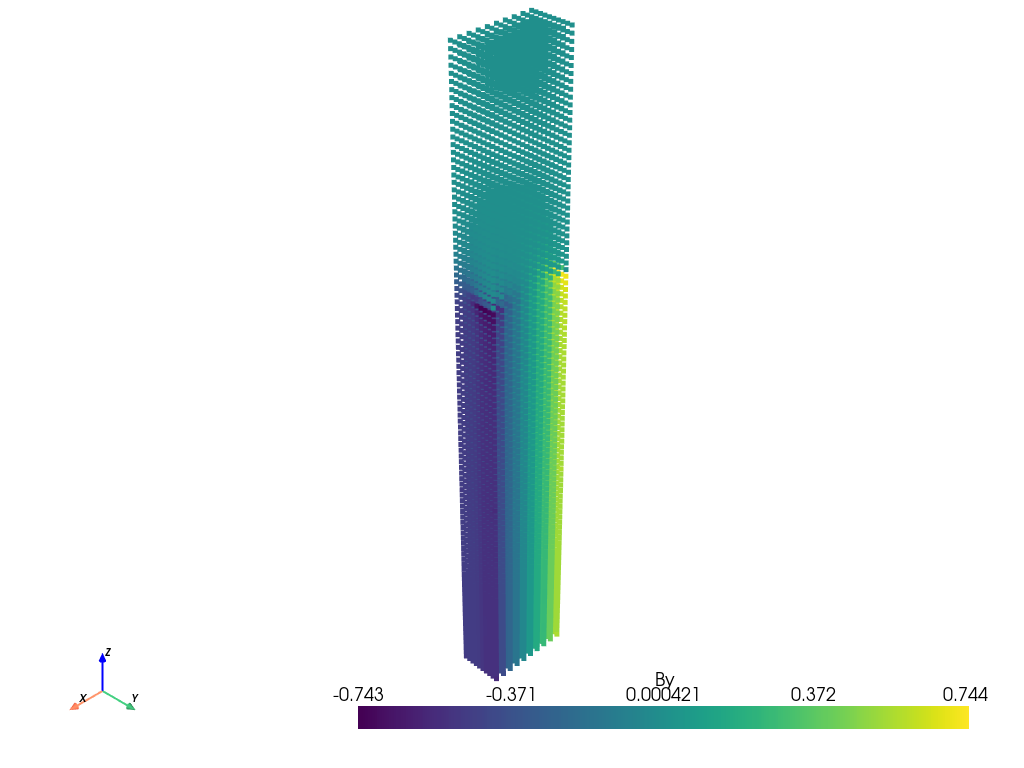

In [86]:
quad.plot_plane(-0.05, 0.05, 10, 0, 0.05, 10, 0, 0.75, 100, "By")

/home/silke/miniforge3/envs/xsuite/lib/python3.13/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


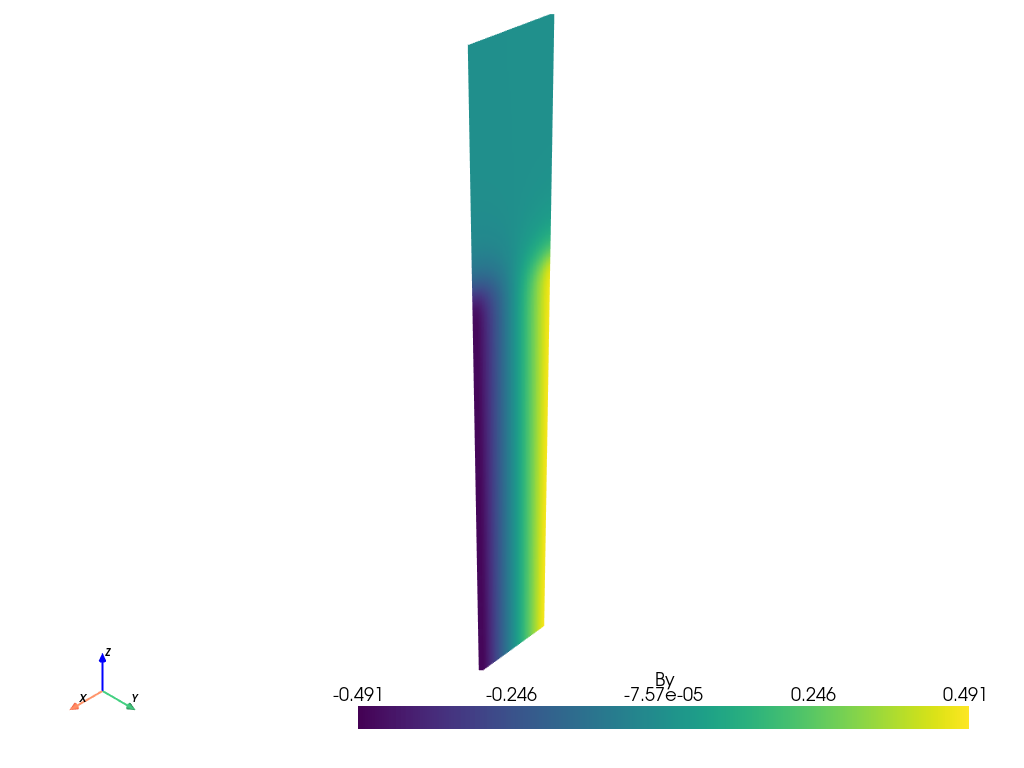

In [87]:
quad.plot_plane(-0.05, 0.05, 50, 0, 0, 1, 0, 0.75, 500, "By")

/home/silke/miniforge3/envs/xsuite/lib/python3.13/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


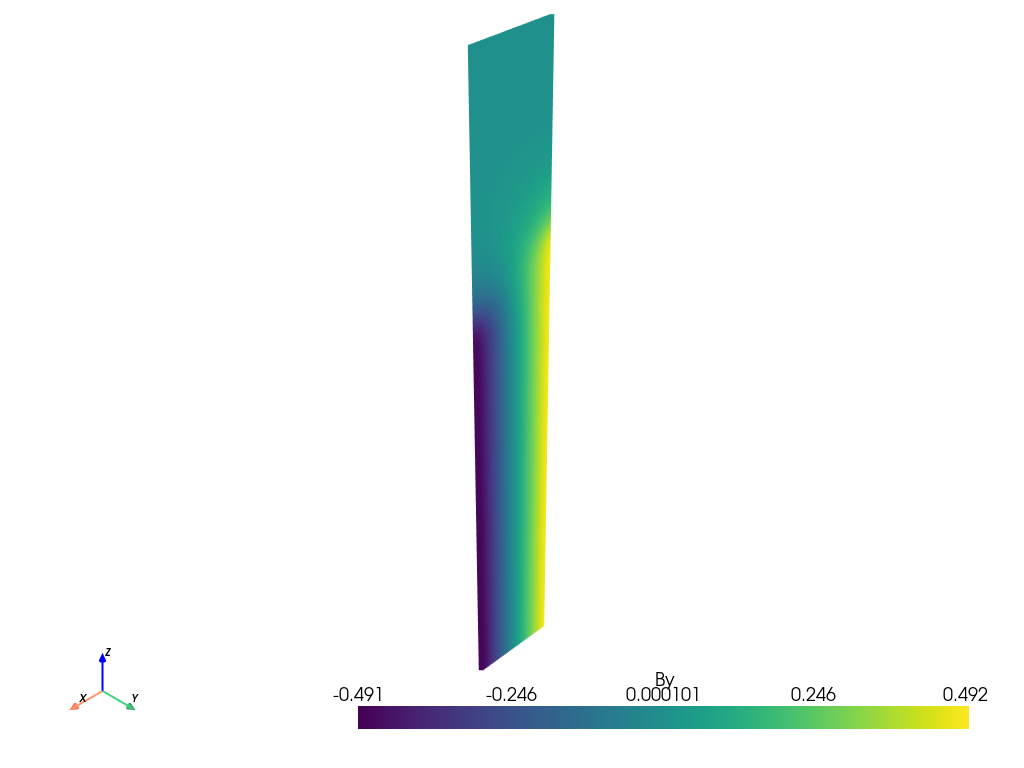

In [88]:
cutquad.plot_plane(-0.05, 0.05, 50, 0, 0, 1, 0, 0.75, 500, "By")

In [89]:
def generate_colormap_colors(n, colormap="viridis"):
    cmap = plt.get_cmap(colormap)  # Load the colormap
    colors = [cmap(i / (n - 1)) for i in range(n)]  # Generate `n` colors
    return colors

In [90]:
fig, ax = plt.subplots()
npoints=50
colors = generate_colormap_colors(npoints)
for i, z in enumerate(np.linspace(0.3, 0.75, npoints)):
    quad.fit_xprofile(-0.05, 0.05, 100, 0, z, "By", ax=ax, color=colors[i])
plt.show()

In [94]:
fig, ax = plt.subplots()
npoints=50
colors = generate_colormap_colors(npoints)
for i, z in enumerate(np.linspace(0.3, 0.75, npoints)):
    cutquad.fit_xprofile(-0.05, 0.05, 100, 0, z, "By", ax=ax, color=colors[i])
plt.show()

In [92]:
fig, ax = plt.subplots()
quad.fit_zprofile(0.3, 0.75, 100, 0, 0, "By", ax=ax, color="green")
cutquad.fit_zprofile(0.3, 0.75, 100, 0, 0, "By", ax=ax, color="blue")
plt.show()